# Scikit learn

In [12]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))
print type(X)

('Class labels:', array([0, 1, 2]))
<type 'numpy.ndarray'>


In [8]:
# Splitting data into 70% training and 30% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# standardize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
print X_test_std.shape

(45, 2)


# Train a perceptron

In [14]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [15]:
y_test.shape

(45,)

In [18]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [19]:
# metrics
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f'%accuracy_score(y_test, y_pred))

Accuracy: 0.91


# Plot graph

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [22]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

print versiontuple(np.__version__) >= versiontuple('1.9.0')

True


In [27]:
def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decison surface
    # -1 +1 for enlarging the boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # np ravel = return a contiguous flatten array
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # contourf = dividing line
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                   alpha=0.6,
                   c=cmap(idx),
                   edgecolor='black',
                   marker=markers[idx],
                   label=cl)
        
    # if test_set > mark marker 'o' and not opaque
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c = '',
                   alpha=1.0,
                   edgecolor='black',
                   linewidths=1,
                   marker = 'o',
                   s=55,
                   label = 'test set')

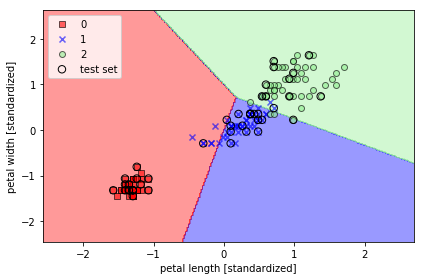

In [28]:
# array 1 2 3
# array 4 5 6

# Stack them vertically

# array 1 2 3
#       4 5 6

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                     classifier=ppn, test_idx = range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
print X_train.shape
print X_test.shape
print X_combined_std.shape

(105, 2)
(45, 2)
(150, 2)


In [32]:
print y_train.shape
print y_test.shape
print y_combined.shape

(105,)
(45,)
(150,)


# Modeling class probabilities via logistic regression

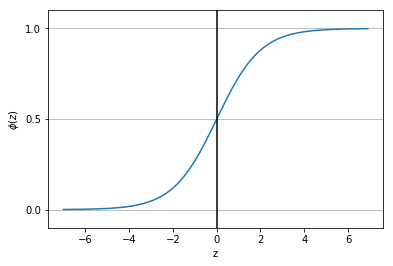

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
# plot a vertical line at 0.0, color = black
plt.axvline(0.0, color='k')
# enlarge the y axis
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis extension for illustration
# yticks = mark only this local
plt.yticks([0.0, 0.5, 1.0])
# get the current axes from yticks
ax = plt.gca()
# plot a horizontal line from y axis
ax.yaxis.grid(True)

plt.show()

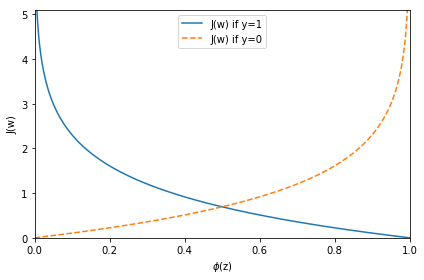

In [60]:
# cost 1 for y=1
def cost_1(z):
    return -np.log(sigmoid(z))

# cost 0 for y=0
def cost_0(z):
    return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)


c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle = '--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Training a logistic regression model with scikit-learn

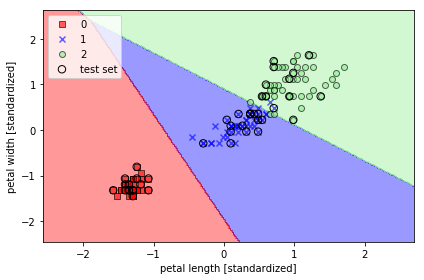

In [63]:
from sklearn.linear_model import LogisticRegression

# C = regularization strength, smaller = stronger regularization
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# test idx = 105 to 150 
plot_decision_regions(X_combined_std, y_combined,
                     classifier=lr, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [65]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

# Tackling overfitting via regularization

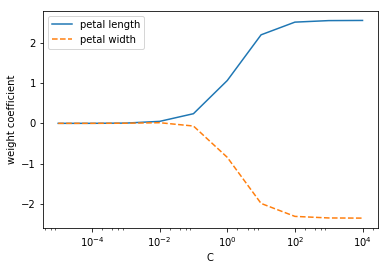

In [67]:
weights, params = [], []

# c is the regularization 1/ lambda
# penalize large weight
for c in np.arange(-5., 5.):
    # -50 to 50
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    
    # coef is 
    weights.append(lr.coef_[1])
    params.append(10**c)

# coef_ : array, shape (1, n_features)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
        label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
        label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='best')
plt.xscale('log')
plt.show()

# weight coefficients shrink if we decrease parameter C 
# decrease C = (increase regularization strength)

# Maximum margin classification with SVM

maximize the margin

vectors on the margin are support vectors

positive = W.T X = 1

Decision boundary = W.T X = 0

negative = W.T X = -1

# Nonlinearly separable case using slack variables

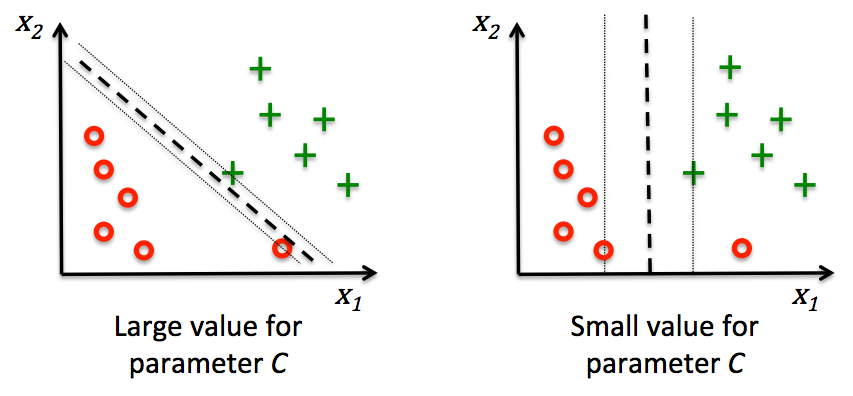

In [71]:
from IPython.display import Image
from IPython.display import display
Image(filename='download.png', width=600)

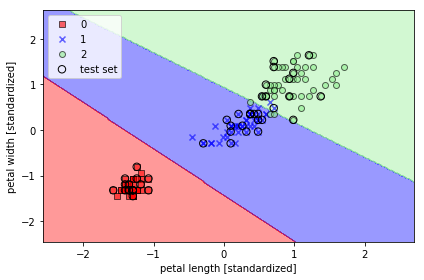

In [72]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                     classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [73]:
# SGD SVM online learning
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Solving non linear problems using SVM kernel

- SVM easily kernelized to solve nonlinear classification

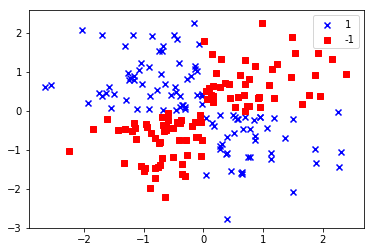

In [74]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)

# Not or
# not(True or False) > not(False) > True
# Create random True False array
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] >0)

# transform into random 1 and -1 array
y_xor = np.where(y_xor, 1, -1)


plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0],X_xor[y_xor==-1, 1],
            c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [75]:
# project them into higher dimensional space via mapping function phi
# phi(x1, x2) = (z1, z2, z3) = (x1, x2, x1**2 + x2**2)
# computationally expensive to construct new features > kernel trick is better

# replace x.T x by phi(x).T x
# widely used kernel- Radial Basis Function kernel
# RBF kernel / Gaussian kernel


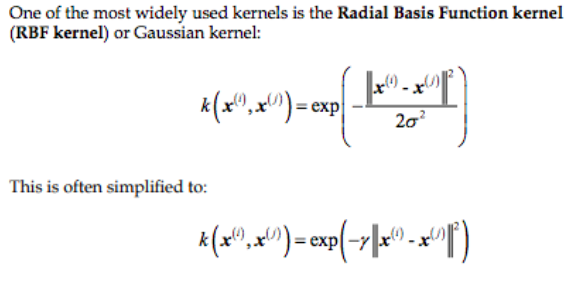

In [76]:
from IPython.display import Image
from IPython.display import display
Image(filename='Screen Shot 2017-12-26 at 12.47.57 AM.png', width=600)

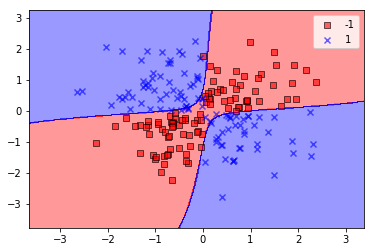

In [81]:
# y (gamma) = 1 / (2sigmoid) ^ 2 is a free parameter to be optimized
# y thingy is gamma = cut-off for Gaussian sphere

# larger gamma = larger influence of traning samples, 
# softer decision boundary

# result 1 = exactly similar, 0 = dissimilar

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='best')
plt.show()

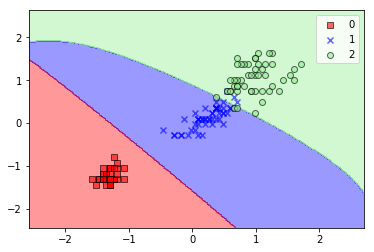

In [84]:
# example of small gamma, softer boundary
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm)
plt.legend(loc='best')
plt.show()

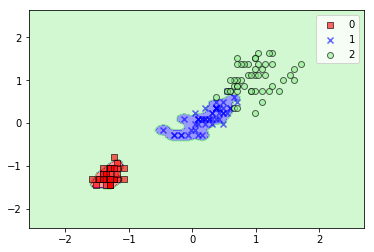

In [85]:
# exmaple of harder decision boundary (large gamma)
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm)
plt.legend(loc='best')
plt.show()

# Decision Tree

same node = same class
many nodes = overfitting

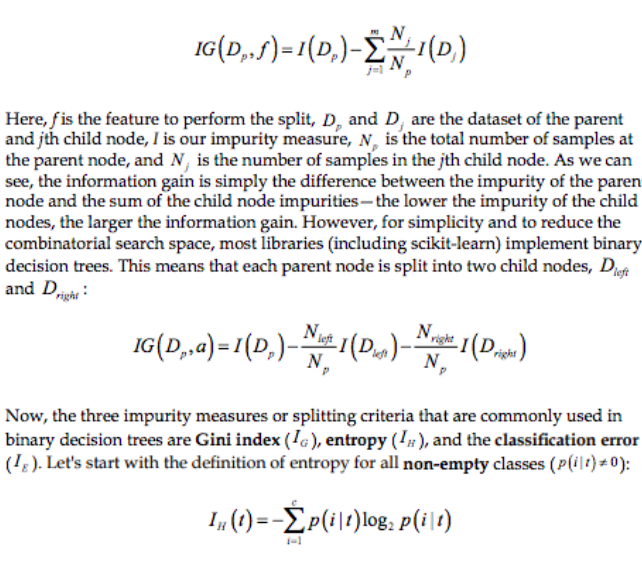

In [86]:
Image(filename='Screen Shot 2017-12-26 at 9.25.26 AM.png', width=600)

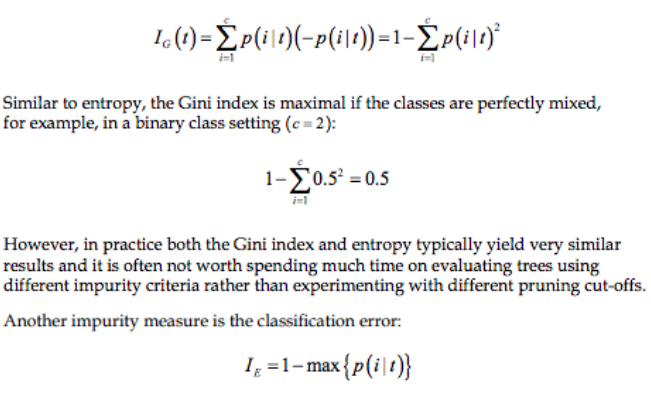

In [87]:
Image(filename='Screen Shot 2017-12-26 at 9.32.57 AM.png', width=600)

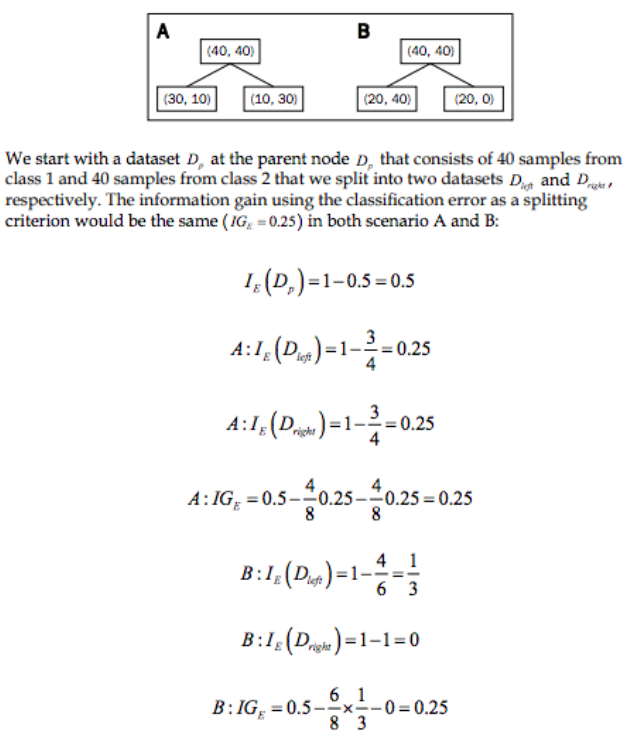

In [88]:
Image(filename='Screen Shot 2017-12-26 at 9.36.11 AM.png', width=600)

In [89]:
# IG Gini index
# IH Entropy
# IE Classification error

# IH = 0 if all same class
# IH = maximal = 1 if uniform class distribution

# IG minimize the probability of misclassification
# IG = maximal if classes are perefectly mixed

# IG and IH yield similar result

# IE is useful but not recommended for growing a decision tree
# sensitive to changes in class probabilities
# See above exmaple, A is more pure, but IE favor B, not good
# IE entropy favor scenario B too

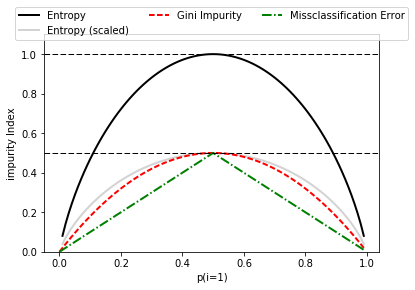

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# IG
def gini(p):
    return p * (1-p) + (1-p)*(1-(1-p))
# IE
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))
# IH
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent] # scaled for illustration
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Missclassification Error'],
                        ['-', '-', '--', '-.'],
                        ['black', 'lightgray', 'red', 'green', 'cyan']):
    
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
             ncol=3, fancybox=True, shadow=False) # legend 
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity Index')
plt.show() 

# Building a decision tree

dividing feature space into rectangle using entropy

# the more complex decision boundary, easily overfitting

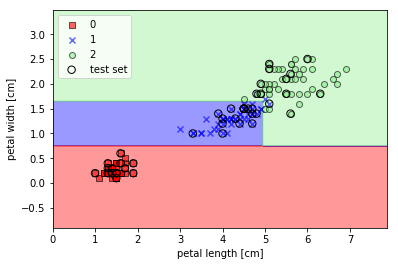

In [97]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack([X_train, X_test])
y_combined = np.hstack([y_train, y_test])

plot_decision_regions(X_combined, y_combined,
                     classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.show()

In [99]:
# can export to dot file for visualization using GraphViz
# from sklearn.tree import export_graphviz
# export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

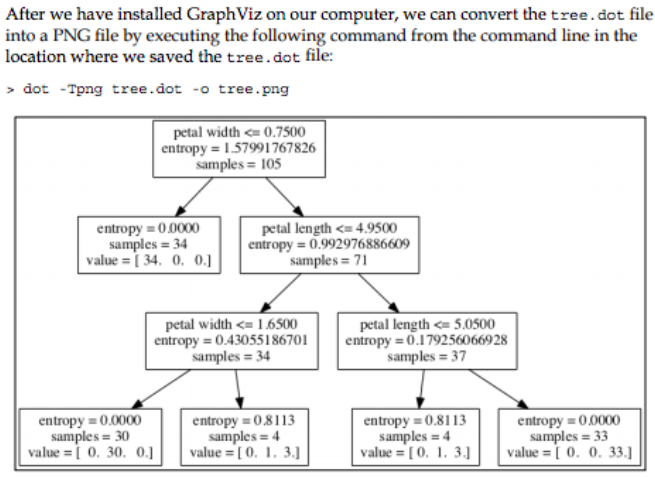

In [101]:
Image(filename='Screen Shot 2017-12-26 at 10.01.45 AM.png', width=600)

# Combining weak to strong learners via random forests

- good classification performance
- scalability
- ease of use

ensemble of decision tree, robust to noise

combine weak learners to build a strong learner

better generalization, less overfitting

only need to choose step 3, how many tree

we control bias-variance tradeoff by choosing sample size n

large n, better performance, decrease randomness, overfitting

number of features at each split, choose smaller than the total number of features in training set, d = sqrt(m) by default 
m is the no. of features in the training set


1. draw a random bootstrap sample of size n (with replacement)
2. Grow a decision tree from bootstrap sample
    2.1 randomly select d features without replacement
    2.2 split the node using the feature that provides the best split according to the objective function (ie. maximizing information gain)
3. Repeat 1,2 for k times
4. Aggregate prediction by each tree to assign the class label by majority vote

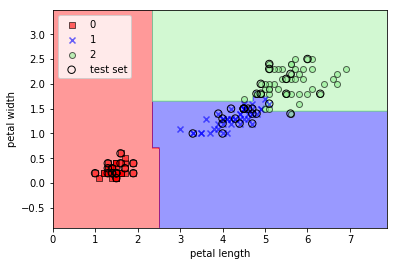

In [104]:
# n_estimators = 10 decision tree
# impurity = entropy
# n_jobs multiple cores
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                               n_estimators = 10,
                               random_state = 1,
                               n_jobs = 4)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=forest, test_idx = range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.show()

# K nearest neighbors

lazy learner, doesn't learn a discriminative function from training data but memorizes the dataset (non parametric)

very susceptible to overfitting due to curse of dimensionality 
- feature space become increasingly sparse for increasing no. of dimension

parametric (perceptron, logistic regrssion, linear SVM)

non parametric (decision tree, forest, kernel SVM) 

memory based approch
- immediately adapts as we collect new training data
- computational complexity for classifying new samples grows linearly with no. of sample in training dataset

1. choose number of k and distance metric
2. Find k nearest neighbors
3. Assign class label by majority vote


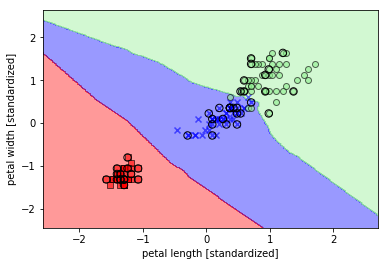

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                          metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

K is crucial for overfitting / underfitting
distance metric needs to be appropriate

if use euclidean distance, standardized the data

minkowski = generalization of euclidean and manhatten distance

in minkowski, p=1 = manhatten distance, p=2 = euclidean diistance


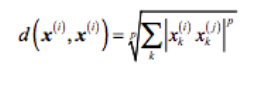

In [111]:
Image(filename='Screen Shot 2017-12-26 at 10.53.11 AM.png', width=600)